<a href="https://colab.research.google.com/github/Adebayo88888888/Fashion-Classification/blob/main/Fashion_Classification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the image dataset from github
! git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 12.14 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
# Check the content of the cloned repo
!ls /content/clothing-dataset-small

LICENSE  README.md  test  train  validation


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.processing.image import load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img

path = './clothing-dataset-small/train/t-shirt'
name = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TensorFlow version:", tf.__version__)

# Enable eager execution
tf.config.run_functions_eagerly(True)

TensorFlow version: 2.19.0


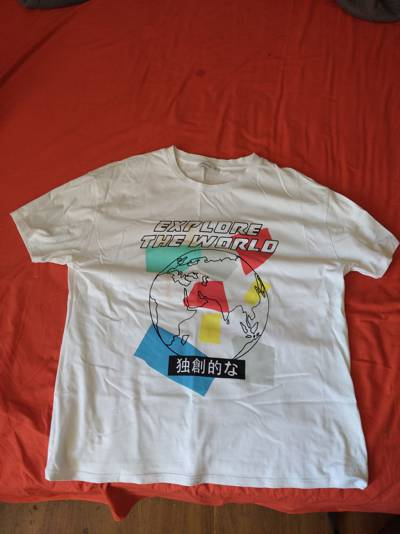

In [4]:
file_path = path + '/' + name
img = load_img(file_path)
img

In [5]:
img = load_img(file_path, target_size = (299, 299))

print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7A78651490D0>


array([[[104,  20,  10],
        [105,  21,  11],
        [105,  21,  11],
        ...,
        [ 43,  35,  33],
        [ 42,  34,  32],
        [ 39,  31,  29]],

       [[105,  21,  11],
        [105,  21,  11],
        [106,  22,  12],
        ...,
        [ 41,  33,  31],
        [ 41,  33,  31],
        [ 40,  32,  30]],

       [[106,  22,  12],
        [106,  22,  12],
        [107,  23,  13],
        ...,
        [ 42,  34,  32],
        [ 41,  33,  31],
        [ 38,  30,  28]],

       ...,

       [[ 88,  67,  40],
        [ 92,  71,  44],
        [ 89,  68,  41],
        ...,
        [ 19,   7,   7],
        [ 19,   7,   7],
        [ 19,   7,   7]],

       [[ 88,  67,  40],
        [ 89,  68,  41],
        [ 85,  64,  37],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]],

       [[ 86,  65,  38],
        [ 91,  70,  43],
        [ 88,  67,  40],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]]], dtype=uint8)
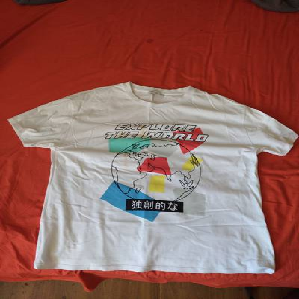

In [6]:
x = np.array(img)
x

In [7]:
# Load a pre-trained model called Xception, trained using Imagenet data
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:

model = Xception(weights = 'imagenet', input_shape=(299,299,3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
X = np.array([x])

In [10]:
X.shape

(1, 299, 299, 3)

In [11]:
model.predict(X)

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2460682e-31,
        2.0293035e-35, 0.0000000e+00, 2.2344109e-31, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.1463384e-38, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [12]:
X = preprocess_input(X)
X

array([[[[-0.18431371, -0.84313726, -0.92156863],
         [-0.17647058, -0.8352941 , -0.9137255 ],
         [-0.17647058, -0.8352941 , -0.9137255 ],
         ...,
         [-0.6627451 , -0.7254902 , -0.7411765 ],
         [-0.67058825, -0.73333335, -0.7490196 ],
         [-0.69411767, -0.75686276, -0.77254903]],

        [[-0.17647058, -0.8352941 , -0.9137255 ],
         [-0.17647058, -0.8352941 , -0.9137255 ],
         [-0.16862744, -0.827451  , -0.90588236],
         ...,
         [-0.6784314 , -0.7411765 , -0.75686276],
         [-0.6784314 , -0.7411765 , -0.75686276],
         [-0.6862745 , -0.7490196 , -0.7647059 ]],

        [[-0.16862744, -0.827451  , -0.90588236],
         [-0.16862744, -0.827451  , -0.90588236],
         [-0.1607843 , -0.81960785, -0.8980392 ],
         ...,
         [-0.67058825, -0.73333335, -0.7490196 ],
         [-0.6784314 , -0.7411765 , -0.75686276],
         [-0.7019608 , -0.7647059 , -0.78039217]],

        ...,

        [[-0.3098039 , -0.47450978, -0

In [13]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


(1, 1000)

In [14]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', np.float32(0.88783556)),
  ('n03710637', 'maillot', np.float32(0.0068345005)),
  ('n04456115', 'torch', np.float32(0.006463633)),
  ('n02730930', 'apron', np.float32(0.005927846)),
  ('n04235860', 'sleeping_bag', np.float32(0.0054279156))]]

### Building on top of the Xception model for our use case (Transfer Learning)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
train_data= train_generator.flow_from_directory('./clothing-dataset-small/train', target_size = (150,150), batch_size = 32)

Found 3068 images belonging to 10 classes.


In [17]:
train_data.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
X,y = next(train_data)

In [ ]:
y.shape

(32, 10)

In [19]:
val_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
val_data= val_generator.flow_from_directory('./clothing-dataset-small/validation', target_size = (150,150), batch_size = 32, shuffle = False)

Found 341 images belonging to 10 classes.


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [20]:
base_model = Xception(weights = 'imagenet', include_top = False, input_shape= (150, 150, 3)) # Include top set to false says we want to remove the dense layer

base_model.trainable = False # To freeze the convolutional layer

inputs = keras.Input(shape = (150,150,3)) #Input is the image of the item

base = base_model(inputs, training = False) # The base model created takes in the input image and return 3D output

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base) # To convert the 3D output into vector representation

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [21]:
preds =  model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


In [22]:
preds[0]

array([-0.20986083,  0.3282041 , -0.16395578,  0.30211365,  1.2853462 ,
        0.0120599 , -0.00355836,  0.21358529, -0.05226912, -0.03171708],
      dtype=float32)

In [23]:
# Get optimizer, that finds the best weight for the model
optimizer = keras.optimizers.Adam(learning_rate = 0.01)

# How does optimizer know how to change the weight for optimum result. Losss functions help
loss = keras.losses.CategoricalCrossentropy(from_logits = True)

In [24]:
# Compile the model
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])


In [25]:
# Fit the model. Epochs to specify how many times we want the training to occur
history = model.fit(train_data, epochs = 3, validation_data = val_data)

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.5830 - loss: 1.5976 - val_accuracy: 0.7478 - val_loss: 1.0237
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 379ms/step - accuracy: 0.8192 - loss: 0.6002 - val_accuracy: 0.8006 - val_loss: 0.7994
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step - accuracy: 0.8976 - loss: 0.3125 - val_accuracy: 0.7713 - val_loss: 0.9459


### Adjusting the learning rate

In [28]:
def make_model(learning_rate = 0.01):
  base_model = Xception(weights = 'imagenet', include_top = False, input_shape= (150, 150, 3)) # Include top set to false says we want to remove the dense layer

  base_model.trainable = False # To freeze the convolutional layer

  inputs = keras.Input(shape = (150,150,3)) #Input is the image of the item

  base = base_model(inputs, training = False) # The base model created takes in the input image and return 3D output

  pooling = keras.layers.GlobalAveragePooling2D()
  vectors = pooling(base) # To convert the 3D output into vector representation

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  optimizer = keras.optimizers.Adam(learning_rate = 0.01)
  loss = keras.losses.CategoricalCrossentropy(from_logits = True)

  model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

  return model

In [ ]:
score = {}

for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
  print()

  model = make_model(learning_rate = lr)
  history = model.fit(train_data, epochs = 10, validation_data = val_data)
  score[lr] = history.history
  print()
  print()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 381ms/step - accuracy: 0.5945 - loss: 1.5021 - val_accuracy: 0.7683 - val_loss: 0.7906
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 377ms/step - accuracy: 0.8372 - loss: 0.5556 - val_accuracy: 0.7830 - val_loss: 0.8080
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 375ms/step - accuracy: 0.9009 - loss: 0.3136 - val_accuracy: 0.7859 - val_loss: 1.0071
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.9031 - loss: 0.2664 - val_accuracy: 0.7302 - val_loss: 1.1546
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.9323 - loss: 0.2129 - val_accuracy: 0.7683 - val_loss: 1.0405
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 389ms/step - accuracy: 0.9563 - loss: 0.1138 - val_accuracy: 0.7977 - val_loss: 0.9607
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 389ms/step - accuracy: 0.9811 - loss: 0.0676 - val_accuracy: 0.8006 - val_loss: 1.0197
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 384ms/step - accuracy: 0.9840 - loss: 0.0567 - val_accuracy: 0.797

In [ ]:
for lr, history in score.items():
    print(f"Learning Rate: {lr}, Validation Accuracy: {history['val_accuracy'][-1]:.4f}")

Learning Rate: 0.0001, Validation Accuracy: 0.8065
Learning Rate: 0.001, Validation Accuracy: 0.8211
Learning Rate: 0.01, Validation Accuracy: 0.8182
Learning Rate: 0.1, Validation Accuracy: 0.8182
Learning Rate: 1, Validation Accuracy: 0.8123


#### Checkpointing

In [29]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max')

In [30]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_data,
    epochs=6,
    validation_data=val_data,
    callbacks=[chechpoint]
)

Epoch 1/6
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6009 - loss: 1.4300

96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 378ms/step - accuracy: 0.6018 - loss: 1.4275 - val_accuracy: 0.7625 - val_loss: 0.8953
Epoch 2/6
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.8390 - loss: 0.5235 - val_accuracy: 0.7537 - val_loss: 1.1217
Epoch 3/6
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.8684 - loss: 0.4033

96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 400ms/step - accuracy: 0.8685 - loss: 0.4028 - val_accuracy: 0.8065 - val_loss: 0.7477
Epoch 4/6
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 373ms/step - accuracy: 0.9350 - loss: 0.1980 - val_accuracy: 0.7625 - val_loss: 1.0049
Epoch 5/6
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 369ms/step - accuracy: 0.9474 - loss: 0.1477 - val_accuracy: 0.8035 - val_loss: 0.8535
Epoch 6/6
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 369ms/step - accuracy: 0.9580 - loss: 0.1089 - val_accuracy: 0.8065 - val_loss: 0.8483


In [34]:
!ls -lh /content


total 161M
drwxr-xr-x 6 root root 4.0K Dec  4 08:15 clothing-dataset-small
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data
-rw-r--r-- 1 root root  81M Dec  4 08:23 xception_v1_01_0.762.h5
-rw-r--r-- 1 root root  81M Dec  4 08:25 xception_v1_03_0.806.h5


#### Regularizing the model

In [32]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [33]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.2]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_data, epochs=10, validation_data=val_data)
    scores[droprate] = history.history

    print()
    print()

0.2
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 388ms/step - accuracy: 0.5394 - loss: 1.3937 - val_accuracy: 0.7801 - val_loss: 0.6734
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 387ms/step - accuracy: 0.7976 - loss: 0.6059 - val_accuracy: 0.8182 - val_loss: 0.5923
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 386ms/step - accuracy: 0.8299 - loss: 0.4846 - val_accuracy: 0.7977 - val_loss: 0.6249
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 386ms/step - accuracy: 0.8793 - loss: 0.3688 - val_accuracy: 0.8035 - val_loss: 0.5697
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 387ms/step - accuracy: 0.9086 - loss: 0.2935 - val_accuracy: 0.8240 - val_loss: 0.5639
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 384ms/step - accuracy: 0.9353 - loss: 0.2222 - val_accuracy: 0.8152 - val_loss: 0.5703
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 383ms/step - accuracy: 0.9486 - loss: 0.1814 - val_accuracy: 0.8182 - val_loss: 0.5993
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 375ms/step - accuracy: 0.9518 - loss: 0.1623 - val_accuracy: 0.835

### Using the Model

In [36]:
model = keras.models.load_model('xception_v1_03_0.806.h5')

In [42]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [43]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.7179 - loss: 0.9580


[0.7697247862815857, 0.7768816947937012]

In [46]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [49]:
img = load_img(path, target_size = (150,150))

In [50]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 150, 150, 3)

In [51]:
X = preprocess_input(X)

In [54]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[ -7.498596 ,  -9.340779 ,  -1.9072337,  -4.052569 ,  10.6636505,
         -7.6928086, -13.957412 ,   0.7648761,  -7.3320966,  -5.2621927]],
      dtype=float32)

In [55]:
pred[0]

array([ -7.498596 ,  -9.340779 ,  -1.9072337,  -4.052569 ,  10.6636505,
        -7.6928086, -13.957412 ,   0.7648761,  -7.3320966,  -5.2621927],
      dtype=float32)

In [56]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [59]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-7.498596),
 'hat': np.float32(-9.340779),
 'longsleeve': np.float32(-1.9072337),
 'outwear': np.float32(-4.052569),
 'pants': np.float32(10.6636505),
 'shirt': np.float32(-7.6928086),
 'shoes': np.float32(-13.957412),
 'shorts': np.float32(0.7648761),
 'skirt': np.float32(-7.3320966),
 't-shirt': np.float32(-5.2621927)}